In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.shape


(768, 9)

In [6]:
df.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

<AxesSubplot:xlabel='Outcome', ylabel='count'>

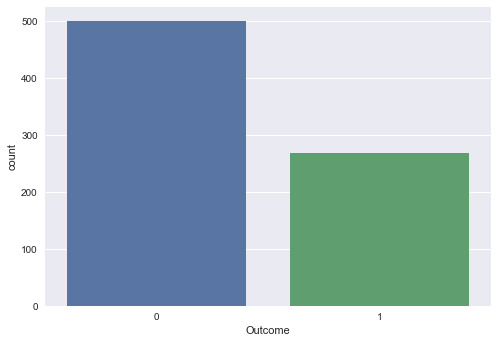

In [7]:
sns.countplot(x='Outcome',data=df)

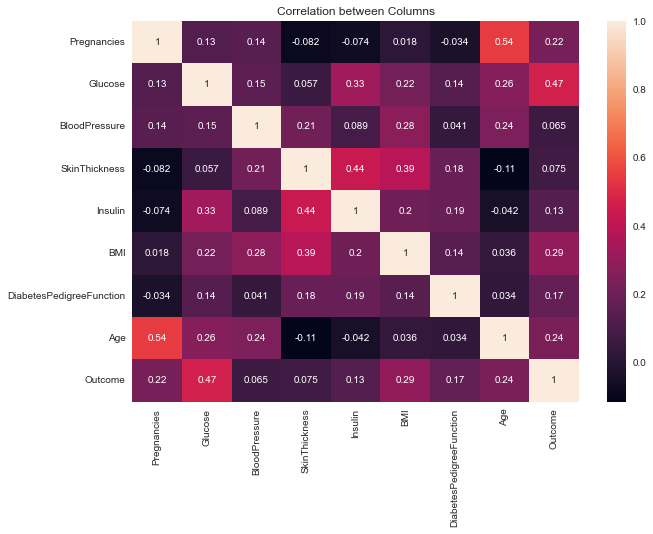

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation between Columns')
plt.show()

In [9]:
df.corr()['Outcome'].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

In [10]:
X=df.drop(columns='Outcome',axis=1)
Y=df['Outcome']

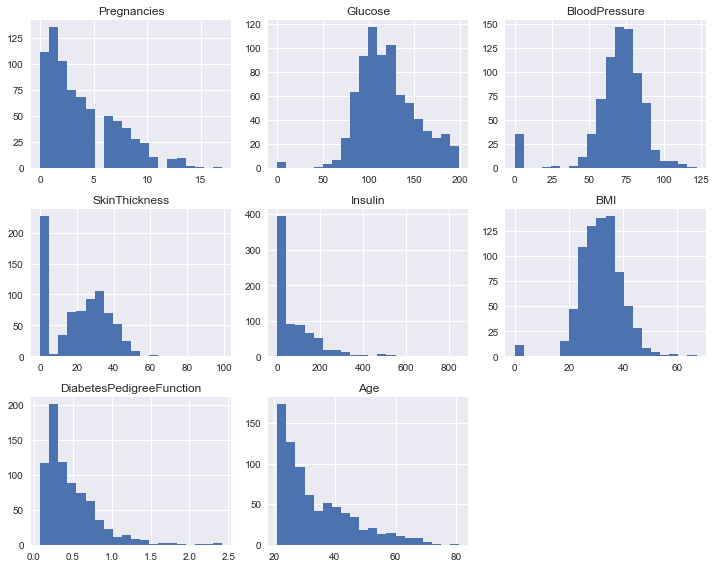

In [11]:
X.hist(figsize=(10,8),bins=20)
plt.tight_layout()
plt.show()

In [12]:
scaler=StandardScaler()

In [15]:
scaler.fit(X)

StandardScaler()

In [17]:
standardized_data=scaler.transform(X)

In [18]:
X=standardized_data
Y=df['Outcome']

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [20]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [21]:
svmModel= svm.SVC(kernel='linear')
svmModel.fit(X_train,Y_train)
svmModel_pred=svmModel.predict(X_test)
svmModel_acc=accuracy_score(svmModel_pred,Y_test)
print("Test Accuracy: {:.2f}%".format(svmModel_acc*100))


Test Accuracy: 75.97%


In [22]:
print(classification_report(Y_test,svmModel_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [23]:
logreg= LogisticRegression()
logreg.fit(X_train,Y_train)
logreg_pred=logreg.predict(X_test)
logreg_acc=accuracy_score(logreg_pred,Y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))


Test Accuracy: 75.32%


In [24]:
print(classification_report(Y_test,logreg_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [28]:
input_data=(5,180,72,22,160,33.6,0.627,50)
input_data_as_numpy_array=np.asarray(input_data)
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
scalar_data=scaler.transform(input_data_reshaped)
prediction=svmModel.predict(scalar_data)
print(prediction)

[1]
